In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
plt.rcParams['figure.figsize']=(16,5)
plt.style.use('fivethirtyeight')

In [ ]:
Data1 = pd.read_csv("insurance.csv")

In [ ]:
df = pd.DataFrame(Data1)

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
def describe(df):


    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []


    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())


    output = pd.DataFrame({
        'variable': variables,
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing value': missing
    })

    return output

In [ ]:
print(describe(df))

   variable    dtype  count  unique  missing value
0       age    int64   1338      47              0
1       sex   object   1338       2              0
2       bmi  float64   1338     548              0
3  children    int64   1338       6              0
4    smoker   object   1338       2              0
5    region   object   1338       4              0
6   charges  float64   1338    1337              0


In [ ]:
fig1 = px.scatter(df, x="age", y="bmi", color="charges", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig1.show()

fig2 = px.scatter(df, x="bmi", y="charges", color="smoker", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig2.show()

fig3 = px.scatter(df, x="age", y="bmi", color="charges", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig3.show()

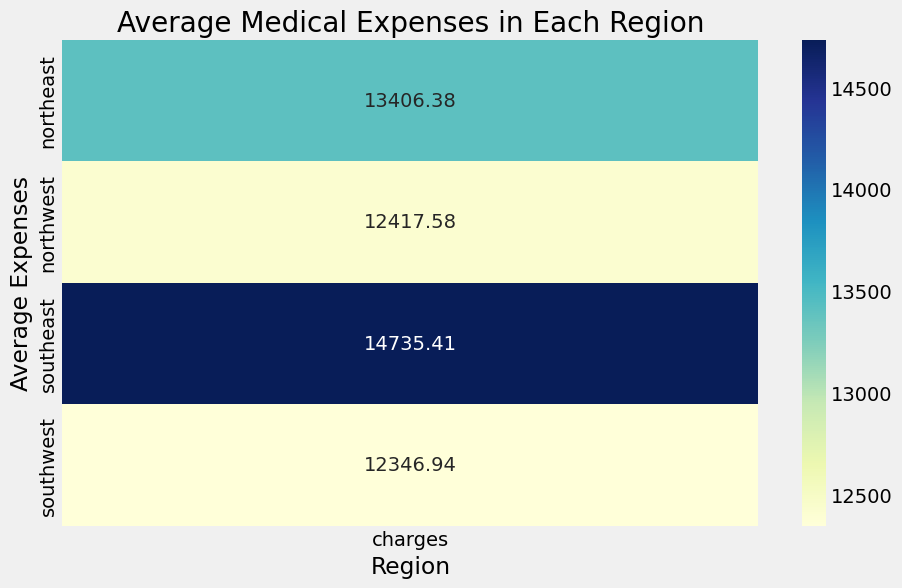

In [ ]:
heatmap_data = df.pivot_table(index='region', values='charges', aggfunc='mean', fill_value=0)

# Generate the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Average Medical Expenses in Each Region')
plt.xlabel('Region')
plt.ylabel('Average Expenses')
plt.show()

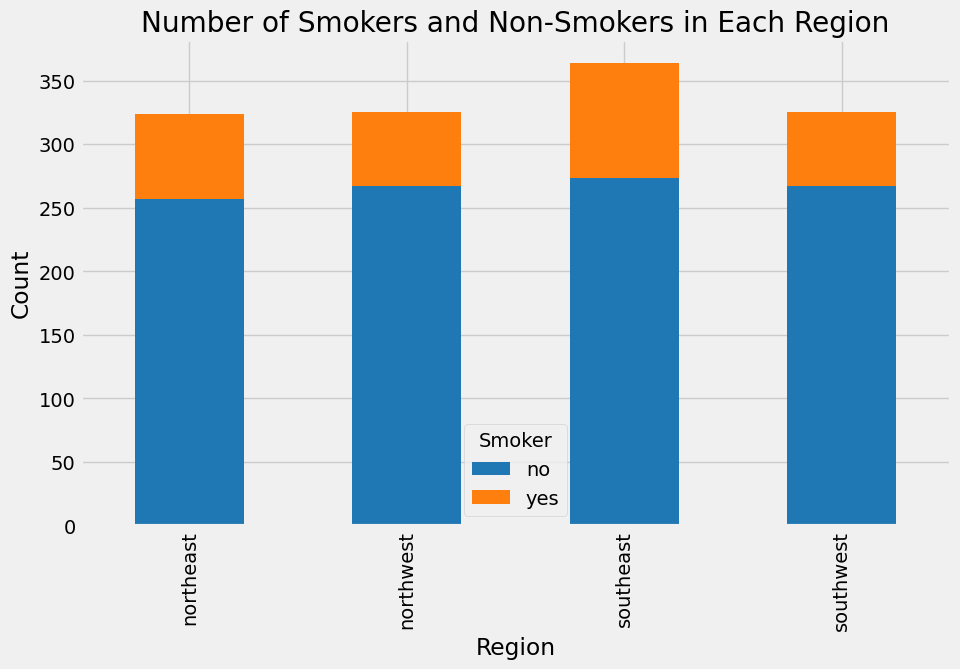

In [ ]:
pivot_table = df.pivot_table(index='region', columns='smoker', aggfunc='size', fill_value=0)

# Generate the stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Number of Smokers and Non-Smokers in Each Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Smoker')
plt.show()

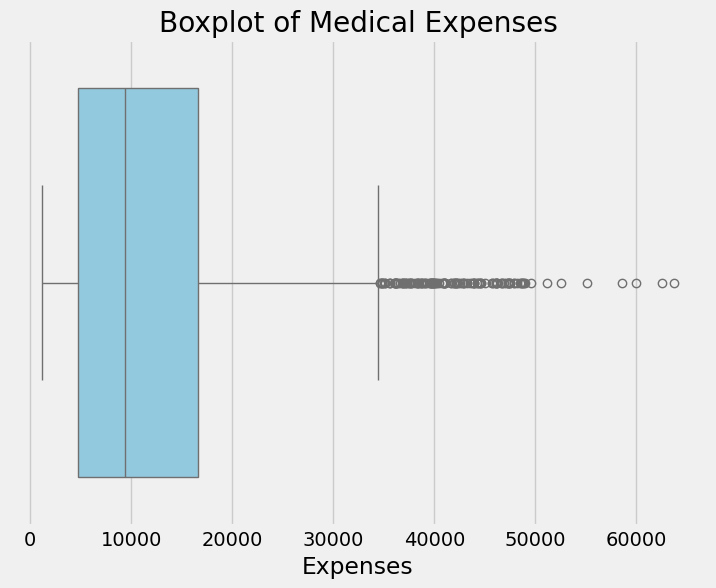

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='charges', data=df, color='skyblue')
plt.title('Boxplot of Medical Expenses')
plt.xlabel('Expenses')
plt.show()

In [ ]:
df['sex']=df['sex'].replace(('male','female'),(2,1))
df['smoker']=df['smoker'].replace(('yes','no'),(2,1))
df['region']=df['region'].replace(('southeast','southwest','northeast','northwest'),(1,2,3,4)) #Data Processing
df.select_dtypes('object').columns

Index([], dtype='object')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,2,2,16884.92400
1,18,2,33.770,1,1,1,1725.55230
2,28,2,33.000,3,1,1,4449.46200
3,33,2,22.705,0,1,4,21984.47061
4,32,2,28.880,0,1,4,3866.85520


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error

# Split the data into training and test sets
features = ['age', 'bmi', 'smoker', 'region', 'sex']
X = df[features]
y = df['charges'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
r2_score=r2_score(y_test,y_pred)
print('R2 Score: ',r2_score)



Mean Squared Error: 34198453.271344304
R2 Score:  0.7797183078873887


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error



# Split the data into training and test sets
features = ['age', 'bmi', 'smoker', 'region', 'sex']
X = df[features]
y = df['charges']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
r2_score=r2_score(y_test,y_pred)
print('R2 Score: ',r2_score)




Mean Squared Error: 20450400.60425848
R2 Score:  0.868273315937901


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_squared_error



# Select relevant features
features = ['age', 'bmi', 'smoker', 'region', 'sex']
X = df[features]
y = df['charges']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)




# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
r2_score=r2_score(y_test,y_pred)
print('R2 Score: ',r2_score)





Mean Absolute Error (MAE): 3316.1348830037314
R2 Score:  0.8203624032519685


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Select relevant features
features = ['age', 'bmi', 'smoker', 'region', 'sex']
X = df[features]
y = df['charges']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Save the model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")



Mean Absolute Error (MAE): 2700.7500265178796
Mean Squared Error (MSE): 22746059.50427351
Root Mean Squared Error (RMSE): 4769.282913004167
R-squared (R²): 0.8534863422991716


In [ ]:
# Receive user input
print("Please enter the following information:")
age = int(input("Age: "))
bmi = float(input("BMI: "))
smoker = int(input("Smoker (1 for no, 2 for yes): "))
region = int(input("Region (1 for Southeast, 2 for Southwest, 3 for Northeast, or 4 for Northwest): "))
sex = int(input("Sex (2 for male, 1 for female): "))

# Make predictions
input_data = [[age, bmi, smoker, region, sex]]
predicted_expenses = rf_model.predict(input_data)[0]

print("Predicted expenses:", predicted_expenses)

Please enter the following information:
